# Predicting Song Popularity Based on Musical Attributes

### Importing

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
%matplotlib inline
sns.set_style('ticks')

In [4]:
songs = pd.read_csv('/content/drive/MyDrive/CCMACLRL_COM231ML_PROJECT/data/newdata/new-dataset.csv')

In [5]:
songs.shape

(114000, 21)

In [6]:
sort_data = songs.sort_values('popularity', ascending=False).reset_index()
songs_sorted = sort_data.drop(['index', 'track_id'], axis=1)
songs_sorted.index = songs_sorted.index + 1

In [7]:
songs_sorted = songs_sorted[songs_sorted.popularity > 0]

songs_sorted[['mode', 'key', 'time_signature']] = \
    songs_sorted[['mode', 'key', 'time_signature']].astype('category')

In [8]:
songs_sorted.shape

(97980, 20)

In [9]:
songs_sorted.head()

,Unnamed: 0,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
2,20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
3,51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
4,89411,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
5,30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm


In [10]:
classified = songs_sorted.copy()
classified['pop_rating'] = 'unpopular'  # Initialize with 'unpopular'

# Use boolean indexing with .loc to classify based on popularity
classified.loc[(classified.popularity > 50) & (classified.popularity < 75), 'pop_rating'] = 'medium'
classified.loc[classified.popularity >= 75, 'pop_rating'] = 'popular'

In [11]:
# Inspect the new column
classified[['track_name', 'popularity', 'pop_rating']].head(3)

,track_name,popularity,pop_rating
1,Unholy (feat. Kim Petras),100,popular
2,Unholy (feat. Kim Petras),100,popular
3,"Quevedo: Bzrp Music Sessions, Vol. 52",99,popular


### Visualization

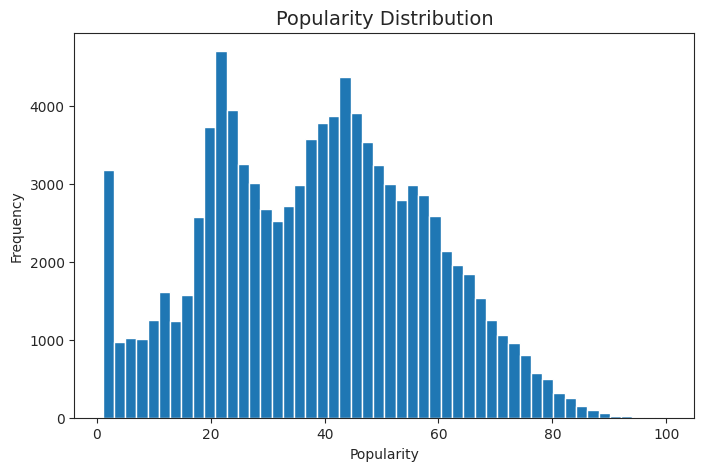

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = songs_sorted['popularity'].plot(kind='hist', bins=50)
_ = plt.xlabel('Popularity')
_ = plt.title('Popularity Distribution', fontsize=14)

In [13]:
songs_sorted[['popularity']].describe()

,popularity
count,97980.000000
mean,38.673127
std,19.201246
min,1.000000
25%,23.000000
50%,39.000000
75%,53.000000
max,100.000000


In [14]:
# Drop non-numeric columns before calculating correlation
numeric_songs_sorted = songs_sorted.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)

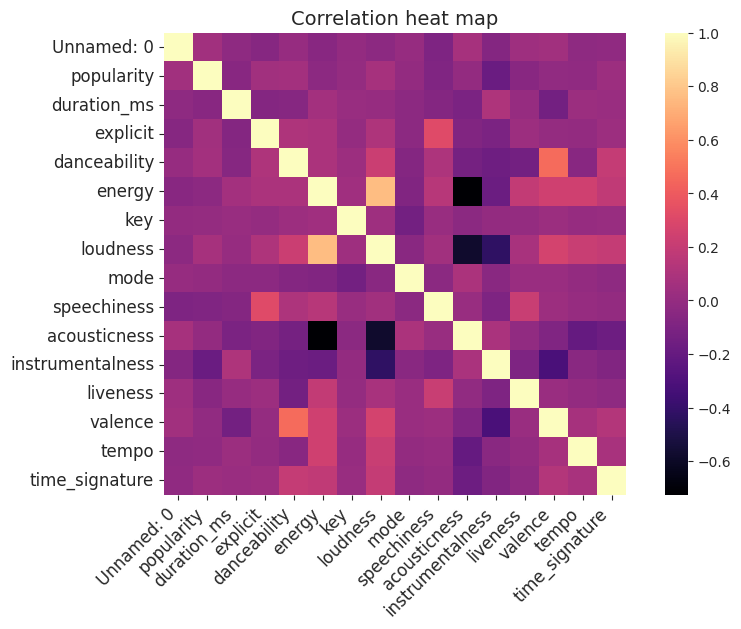

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
_ = sns.heatmap(numeric_songs_sorted.corr(), square=True, cmap='magma')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)
_ = plt.xticks(rotation=45, ha='right')

In [16]:
def scat_plot(x, y, hue=None, palette=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.scatterplot(x=x, y=y, hue=hue, palette=palette, s=12)
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.legend(fontsize=12)
    plt.show()

In [17]:
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line
    using given inputs'''
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={"s": 10}, line_kws={'color':'r'})
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14)
    _ = plt.ylim(-3, 103)
    plt.show()

In [18]:
s = songs_sorted

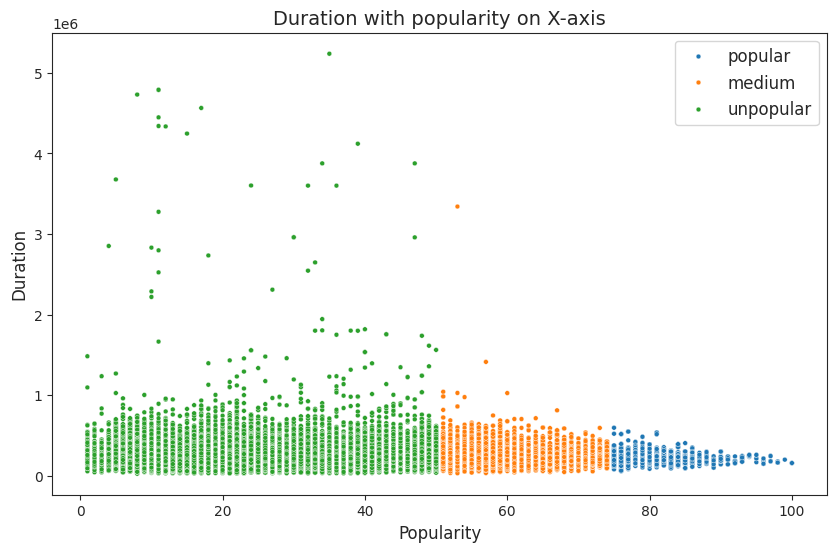

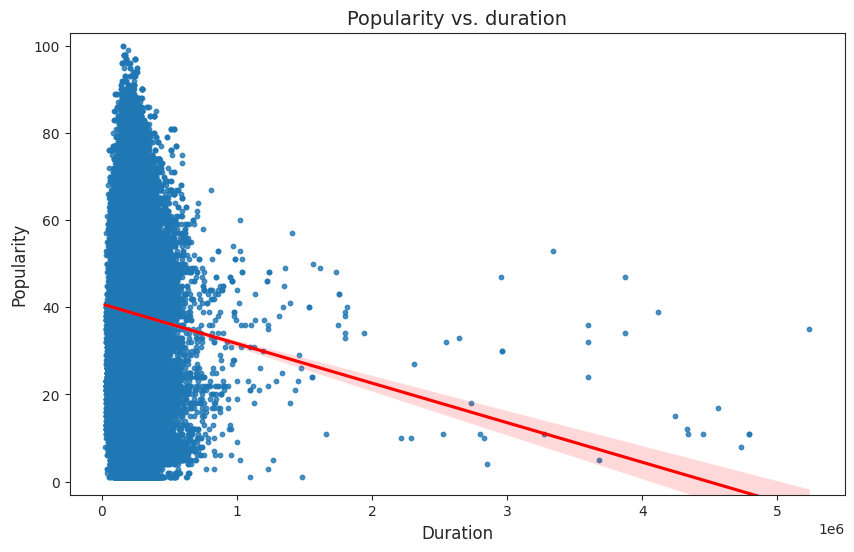

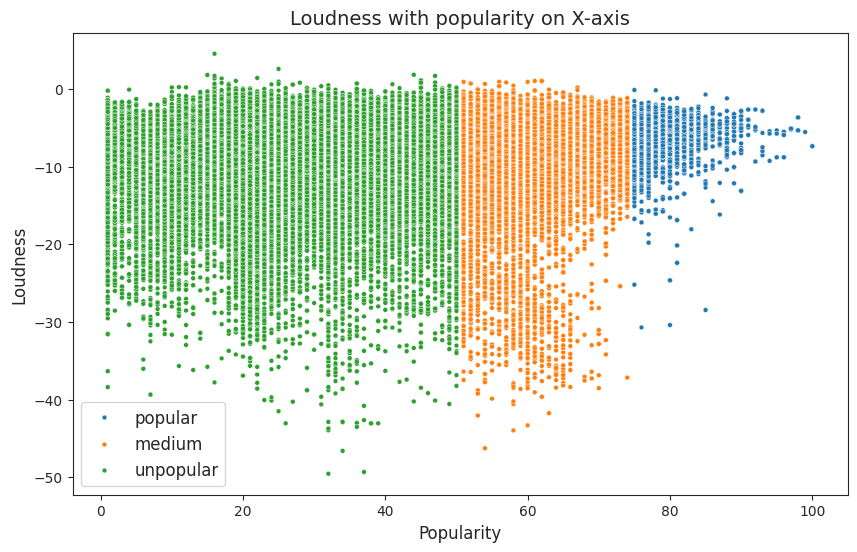

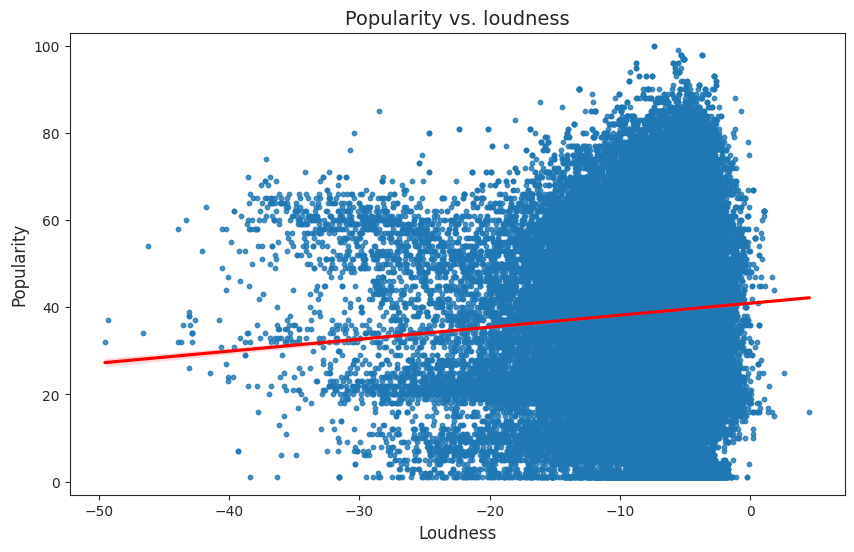

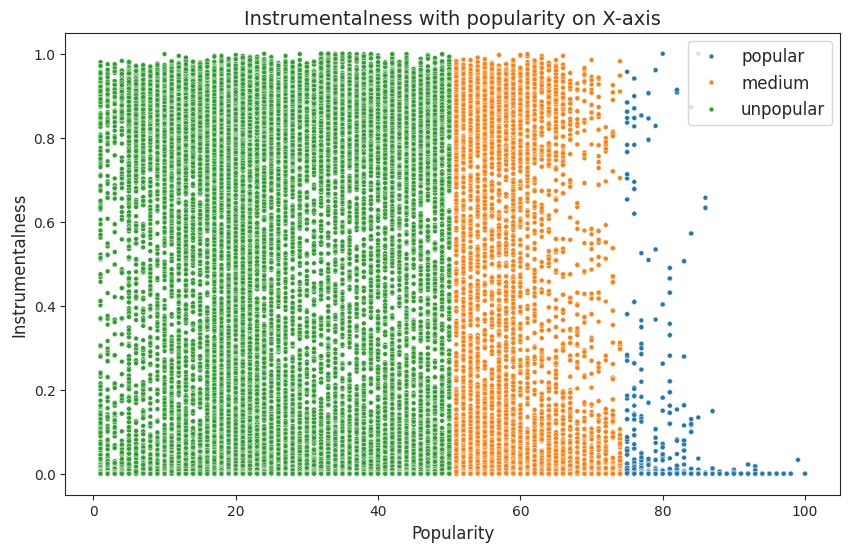

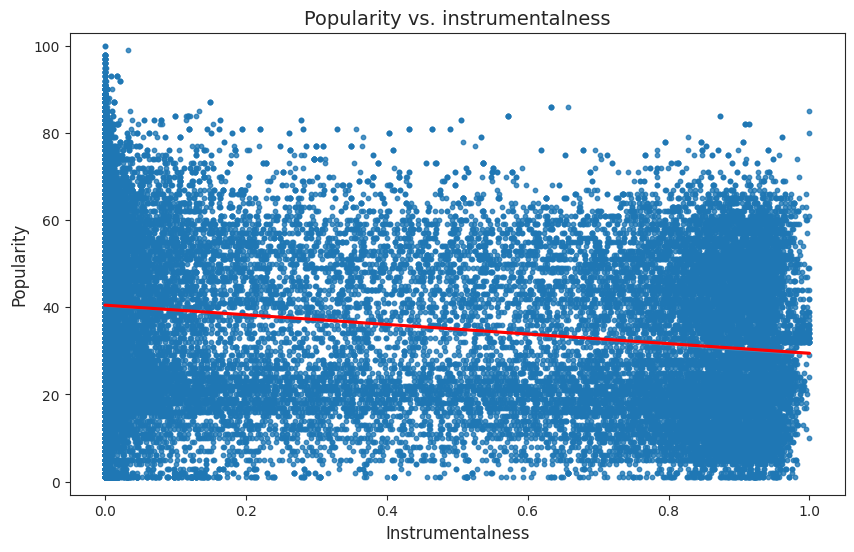

In [19]:
scat_plot(x=s.popularity, y=s.duration_ms, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Duration', titl='Duration with popularity on X-axis')

regress_plot(x='duration_ms', y='popularity', data=s, xlab='Duration',\
         ylab='Popularity', titl='Popularity vs. duration')

scat_plot(x=s.popularity, y=s.loudness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Loudness', titl='Loudness with popularity on X-axis')

regress_plot(x='loudness', y='popularity', data=s, xlab='Loudness',\
         ylab='Popularity', titl='Popularity vs. loudness')

scat_plot(s.popularity, s.instrumentalness, hue=classified.pop_rating, xlab='Popularity',\
         ylab='Instrumentalness', titl='Instrumentalness with popularity on X-axis')

regress_plot('instrumentalness', 'popularity', data=s, xlab='Instrumentalness',\
         ylab='Popularity', titl='Popularity vs. instrumentalness')

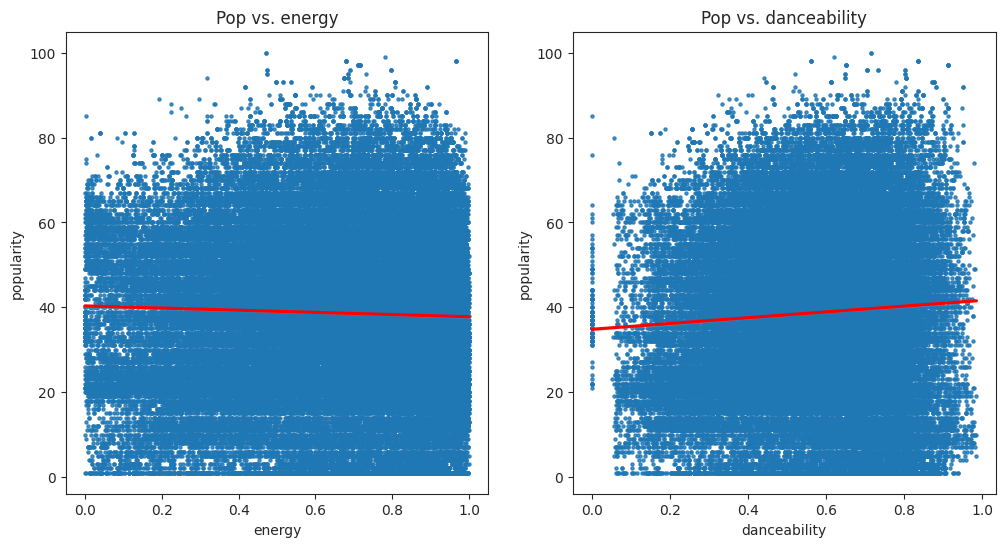

In [20]:
fig = plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
_ = sns.regplot(x=s.energy, y=s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. energy')

ax2 = plt.subplot(1,2,2)
_ = sns.regplot(x=s.danceability, y=s.popularity, scatter_kws={"s": 5}, line_kws={'color':'r'})
_ = plt.title('Pop vs. danceability')

In [21]:
state=25

reg_data = songs_sorted.sample(frac=1, random_state=state).reset_index(drop=True)

X = reg_data.select_dtypes(include='number').drop('popularity', axis=1)
y = reg_data.popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=state)

In [22]:
popular_artists = classified[classified['pop_rating'] == 'popular']
popular_artists_counts = popular_artists['artists'].value_counts().reset_index()
popular_artists_counts.columns = ['artists', 'popular_song_count']
popular_artists_counts_sorted = popular_artists_counts.sort_values(by='popular_song_count', ascending=False)
popular_artists_counts_sorted.head(40)

,artists,popular_song_count
0,Bad Bunny,48
1,Red Hot Chili Peppers,34
2,Arctic Monkeys,31
3,The Neighbourhood,27
4,BTS,25
7,Linkin Park,21
5,XXXTENTACION,21
6,Adele,21
10,Guns N' Roses,20
8,Billie Eilish,20


In [23]:
artists = ['Kate Bush', 'Avicii', 'JBee', 'Calvin Harris']

# create validation set
validation = classified[classified.artists.isin(artists)].copy()
print("Shape of validation DataFrame:", validation.shape)

# for validation
to_drop = validation.index.tolist()

# Remove the validation set from data
classified.drop(to_drop, inplace=True)
songs.drop(to_drop, inplace=True)

Shape of validation DataFrame: (54, 21)


### Linear Regression

In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
lin_pred = linreg.predict(X_test)
linreg.score(X_test, y_test)

0.06564316753965393

In [26]:
unnamed = reg_data.drop(['artists','track_name','album_name'], axis=1)
df_encoded = pd.get_dummies(unnamed)
df_encoded.columns

Index(['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=146)

In [27]:
X_2 = df_encoded.drop('popularity', axis=1)
y_2 = df_encoded.popularity

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=state)

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.4204146395136015


#### Evaluate LR




In [29]:
cvals = cross_val_score(lr, X_train, y_train, cv=10)

print(cvals)
print('Mean CVS: {num:.{dig}f}'.format\
      (num=np.mean(cvals), dig=4))

[0.43216091 0.44077505 0.40178565 0.41457082 0.38849799 0.41532793
 0.41362912 0.41491208 0.40709809 0.40372418]
Mean CVS: 0.4132


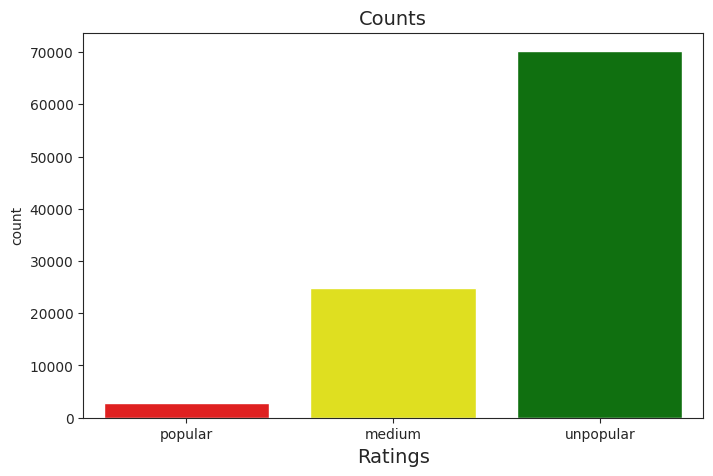

In [30]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
colors = ['red', 'yellow', 'green']
_ = sns.countplot(x='pop_rating', data=classified, palette=colors, hue='pop_rating', legend=False)
_ = plt.xlabel('Ratings', fontsize=14)
_ = plt.title('Counts', fontsize=14)

In [31]:
df = classified.drop(['artists', 'track_name'], axis=1)
df = pd.get_dummies(df, columns=['key', 'mode', 'time_signature'])
df.shape

(97926, 35)

In [32]:
df_pop = df[df.pop_rating == 'popular']

df_med = df[df.pop_rating == 'medium']

df_unpop = df[df.pop_rating == 'unpopular']

# Set random seed
state=25

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df_pop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_pop.pop_rating, test_size=0.15, random_state=state)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(df_med.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_med.pop_rating, test_size=0.15, random_state=state)

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(df_unpop.drop(['popularity', 'pop_rating'], axis=1),\
                                                 df_unpop.pop_rating, test_size=0.15, random_state=state)

In [33]:
pop_train = pd.concat([X_train_p, y_train_p], axis=1)
med_train = pd.concat([X_train_m, y_train_m], axis=1)
unpop_train = pd.concat([X_train_up, y_train_up], axis=1)

training = pd.concat([pop_train, med_train, unpop_train], axis=0)

training = training.sample(frac=1, random_state=state).reset_index(drop=True)

# Popularity has been removed, so only 30 columns
training.shape

(83235, 34)

In [34]:
pop_test = pd.concat([X_test_p, y_test_p], axis=1)
med_test = pd.concat([X_test_m, y_test_m], axis=1)
unpop_test = pd.concat([X_test_up, y_test_up], axis=1)

final_test = pd.concat([pop_test, med_test, unpop_test], axis=0)

final_test = final_test.sample(frac=1, random_state=state).reset_index(drop=True)

final_test.shape

(14691, 34)

In [35]:
X_class = training.drop(['pop_rating', 'album_name', 'track_genre'], axis=1)
y_class = training.pop_rating

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.25, random_state=state)

### Decision Tree

In [36]:
dt = DecisionTreeClassifier(max_depth=20, random_state=state)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

print(accuracy_score(pred, y_test))

0.7461675236676438


In [37]:
cvals = cross_val_score(dt, X_train, y_train, cv=10)

print(cvals)
print('Mean CVS: {num:.{dig}f}'.format\
      (num=np.mean(cvals), dig=4))

[0.75989108 0.75028031 0.7581291  0.74563511 0.73970847 0.75668749
 0.73902595 0.75776995 0.74767703 0.75648831]
Mean CVS: 0.7511


### Random Forest

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=state)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print(accuracy_score(rf_pred, y_test))

0.8142630592532077


In [39]:
cvals = cross_val_score(rf, X_train, y_train, cv=10)

print(cvals)
print('Mean CVS: {num:.{dig}f}'.format\
      (num=np.mean(cvals), dig=4))

[0.81451225 0.81098831 0.80490149 0.8079449  0.80986705 0.81066795
 0.80983659 0.80679269 0.80791413 0.80983659]
Mean CVS: 0.8093


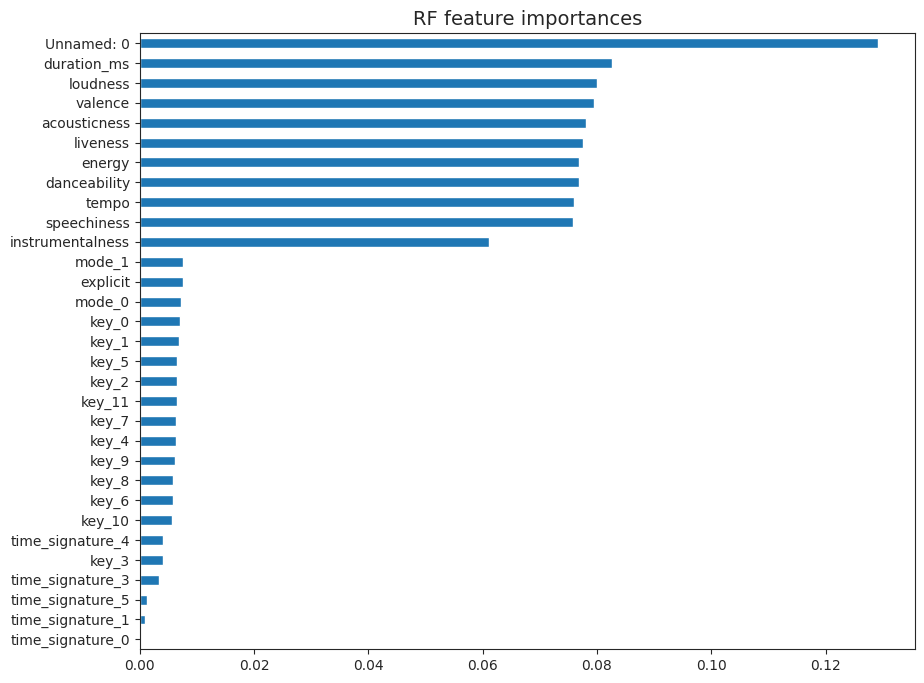

In [40]:
important = pd.Series(data=rf.feature_importances_, index=X_train.columns).sort_values()

fig = plt.subplots(figsize=(10,8))
_ = important.plot(kind='barh')
_ = plt.title('RF feature importances', fontsize=14)

In [41]:
confusion_matrix(y_test, rf_pred)

array([[ 2262,    15,  3083],
       [   75,   203,   302],
       [  375,    15, 14479]])

In [42]:
print(classification_report(y_test, rf_pred, labels=np.unique(y_test)))

              precision    recall  f1-score   support

      medium       0.83      0.42      0.56      5360
     popular       0.87      0.35      0.50       580
   unpopular       0.81      0.97      0.88     14869

    accuracy                           0.81     20809
   macro avg       0.84      0.58      0.65     20809
weighted avg       0.82      0.81      0.79     20809



In [43]:
X_final = final_test.drop(['pop_rating', 'album_name', 'track_genre'], axis=1)
y_final = final_test.pop_rating

rf_ho_p = rf.predict(X_final)

In [44]:
print(accuracy_score(rf_ho_p, y_final))

0.8180518684909128


In [45]:
confusion_matrix(y_final, rf_ho_p)

array([[ 1594,    17,  2129],
       [   41,   167,   213],
       [  252,    21, 10257]])

In [46]:
print(classification_report(y_final, rf_ho_p, labels=np.unique(y_final)))

              precision    recall  f1-score   support

      medium       0.84      0.43      0.57      3740
     popular       0.81      0.40      0.53       421
   unpopular       0.81      0.97      0.89     10530

    accuracy                           0.82     14691
   macro avg       0.82      0.60      0.66     14691
weighted avg       0.82      0.82      0.80     14691



### Trying new data

In [47]:
val_mix = validation.sample(frac=1.0, random_state=state).reset_index(drop=True)

val_drop = val_mix.drop(['artists', 'track_name', 'popularity', 'album_name', 'track_genre'], axis=1)
val_enc = pd.get_dummies(val_drop, columns=['key', 'mode', 'time_signature'])

val_X = val_enc.drop(['pop_rating'], axis=1)
val_y = val_mix[['pop_rating']]

val_pred = pd.DataFrame(rf.predict(val_X), columns=['predicted_pop'])

In [48]:
results = pd.concat([val_mix, val_pred], axis=1)
display(results[['artists', 'track_name','popularity', 'pop_rating', 'predicted_pop']])

,artists,track_name,popularity,pop_rating,predicted_pop
0,Kate Bush,Army Dreamers,3,unpopular,unpopular
1,Avicii,The Nights,86,popular,unpopular
2,JBee,4am,75,popular,unpopular
3,Kate Bush,Hounds Of Love,61,medium,unpopular
4,Kate Bush,Wuthering Heights,71,medium,unpopular
5,Calvin Harris,My Way,76,popular,unpopular
6,Avicii,The Nights,58,medium,unpopular
7,Kate Bush,Babooshka,65,medium,unpopular
8,JBee,24's,66,medium,unpopular
9,Avicii,Waiting For Love,81,popular,unpopular
